# Day 6 — CNN on CIFAR-10
Exploring deeper CNNs inspired by architectures like AlexNet/ResNet.

## Step 1: Load Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers #type:ignore
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## Step 2: Define Deeper CNN

In [2]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])
model.summary()

d:\40-Days-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Compile & Train Model

In [3]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 97ms/step - accuracy: 0.4359 - loss: 1.5540 - val_accuracy: 0.5814 - val_loss: 1.1760
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.5990 - loss: 1.1313 - val_accuracy: 0.6580 - val_loss: 0.9683
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.6703 - loss: 0.9379 - val_accuracy: 0.7130 - val_loss: 0.8204
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.7102 - loss: 0.8251 - val_accuracy: 0.7177 - val_loss: 0.7971
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.7372 - loss: 0.7420 - val_accuracy: 0.7564 - val_loss: 0.7072
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.7599 - loss: 0.6826 - val_accuracy: 0.7655 - val_loss: 0.6686
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.7750 - loss: 0.6419 - val_accuracy: 0.7681 - val_loss: 0.6621
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.7907 - loss: 0.5959

## Step 4: Plot Accuracy Curves

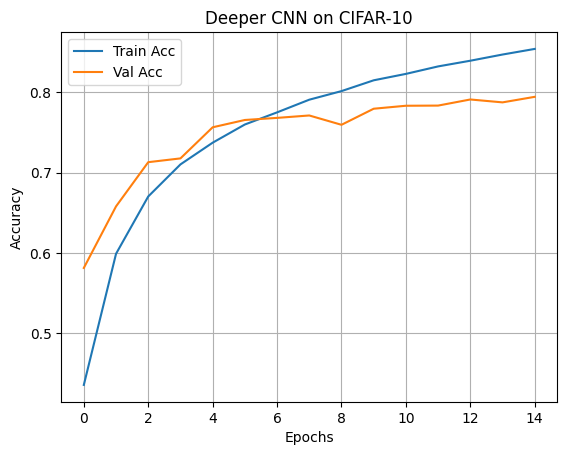

In [4]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Deeper CNN on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Evaluate Model

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final Test Accuracy:", test_acc)

Final Test Accuracy: 0.7943000197410583
